# Assignment on simple linear regression

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# read the data
df = pd.read_csv(r"D:\Assignments\Simple linear regression\Salary_Data.csv",header=0)
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# EDA and Data Visualization

In [4]:
df.shape

(30, 2)

In [7]:
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
df.describe(include='all')

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
#no na/nan values present
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
for i in df:
    print(df[i].unique())

[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.7  3.9  4.   4.1  4.5  4.9
  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6 10.3 10.5]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


array([[<AxesSubplot: title={'center': 'YearsExperience'}>]], dtype=object)

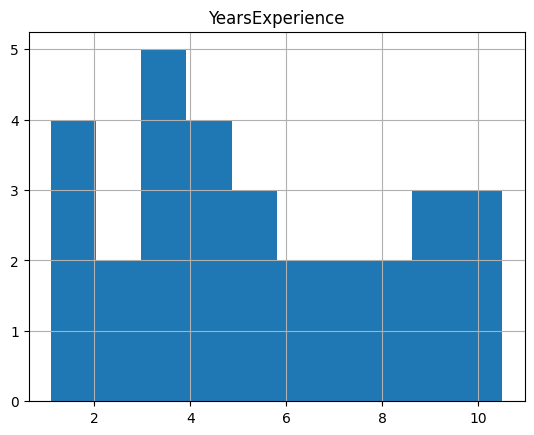

In [9]:
df.hist('YearsExperience')

array([[<AxesSubplot: title={'center': 'Salary'}>]], dtype=object)

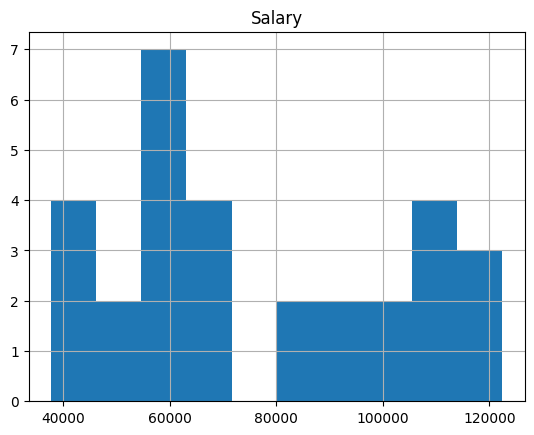

In [22]:
data.hist('Salary')

In [11]:
from scipy.stats import kurtosis

print(kurtosis(df.YearsExperience))
print(kurtosis(df.Salary))

-1.0447521989892943
-1.2829125042427751


In [12]:
from scipy.stats import skew

print(skew(df.YearsExperience))
print(skew(df.Salary))

0.3603123252525561
0.3361618825592921


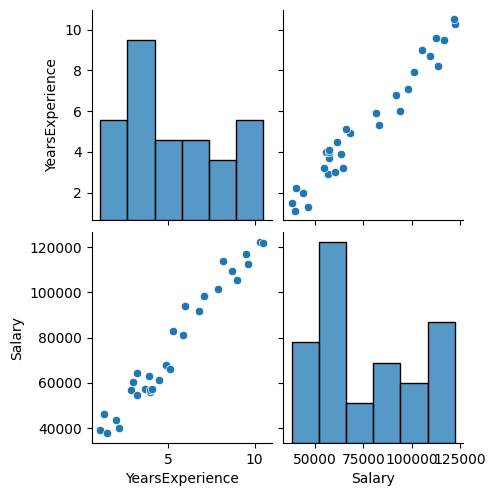

In [13]:
# Create the default pairplot
sns.pairplot(df)    #positve correlation

C:\Users\Dell\AppData\Local\Temp\ipykernel_4068\3871720387.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['YearsExperience'])


<AxesSubplot: xlabel='YearsExperience', ylabel='Density'>

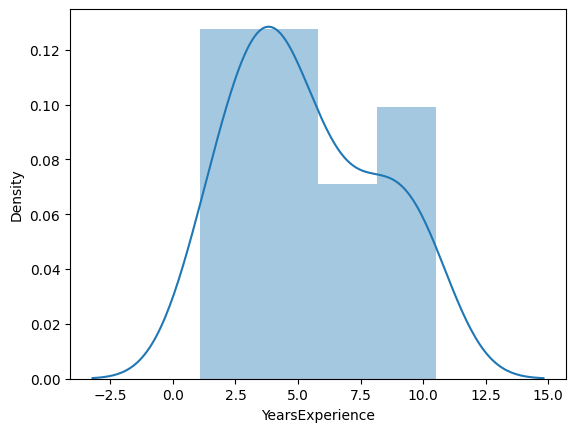

In [16]:
sns.distplot(df['YearsExperience'])

In [17]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot: >

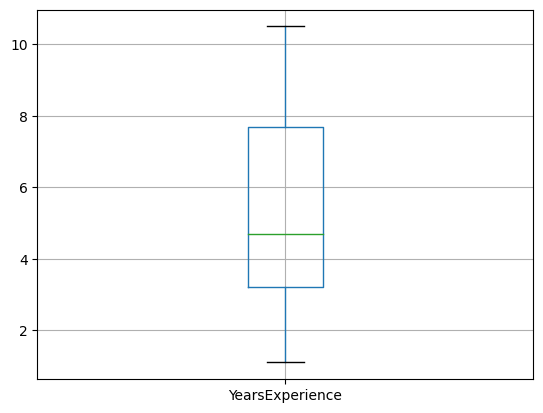

In [18]:
#Box plot : no outliers
df.boxplot('YearsExperience')

<AxesSubplot: xlabel='YearsExperience', ylabel='Salary'>

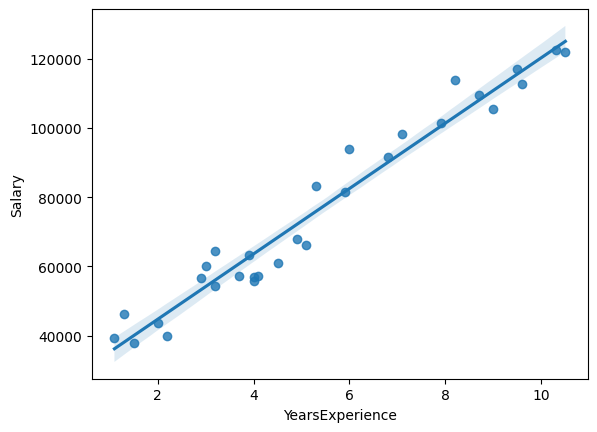

In [19]:
sns.regplot(x=df['YearsExperience'],y=df['Salary'])

# Model Building

In [23]:
import statsmodels.formula.api as smf
model=smf.ols("Salary~YearsExperience",data=df).fit()

In [24]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 10 Feb 2023   Prob (F-statistic):           1.14e-20
Time:                        14:27:28   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Prediction

In [28]:
exp_newdata = pd.DataFrame(newdata,columns=['YearsExperience'])

In [29]:
exp_newdata

,YearsExperience
0,12
1,14
2,16
3,10
4,8


In [36]:
model.predict(exp_newdata)

0    139191.748056
1    158091.672699
2    176991.597342
3    120291.823413
4    101391.898770
dtype: float64

In [35]:
# Manual prediction for say sorting time 8
D = (25792.200199) + (9449.962321)*(3)
D

54142.087162

# Building model with Logarithmic Transformation: Y = a + b * log(x)

In [39]:
# Preparing data for model building
data1 = pd.DataFrame.copy(df)
data1['log_YearsExperience'] = np.log(data1.YearsExperience)
data1.head()

,YearsExperience,Salary,log_YearsExperience
0,1.1,39343.0,0.095310
1,1.3,46205.0,0.262364
2,1.5,37731.0,0.405465
3,2.0,43525.0,0.693147
4,2.2,39891.0,0.788457


In [40]:
# Building model
log_model = smf.ols('Salary ~ log_YearsExperience', data = data1).fit()

In [41]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Fri, 10 Feb 2023   Prob (F-statistic):           3.25e-13
Time:                        16:11:16   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
log_YearsExperience  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Building model with exponential transformation :log(Y) =α + βX + ε

In [42]:
# Preparing data for model building
data2 = pd.DataFrame.copy(df)
data2['log_Salary'] = np.log(data2.Salary)
data2.head()

,YearsExperience,Salary,log_Salary
0,1.1,39343.0,10.580073
1,1.3,46205.0,10.740843
2,1.5,37731.0,10.538237
3,2.0,43525.0,10.681091
4,2.2,39891.0,10.593906


In [43]:
# Building model
exp_model = smf.ols('log_Salary ~ YearsExperience', data = data2).fit()

In [44]:
exp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_Salary   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Fri, 10 Feb 2023   Prob (F-statistic):           7.03e-18
Time:                        16:13:47   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Building model with square root transformation: √Y = a + b * X + e¶

In [45]:
# Preparing data for model building
data3 = pd.DataFrame.copy(df)
data3['sqrt_Salary'] = np.log(data3.Salary)
data3.head()

,YearsExperience,Salary,sqrt_Salary
0,1.1,39343.0,10.580073
1,1.3,46205.0,10.740843
2,1.5,37731.0,10.538237
3,2.0,43525.0,10.681091
4,2.2,39891.0,10.593906


In [46]:
# Building model
sqrt_model = smf.ols('sqrt_Salary ~ YearsExperience', data = data3).fit()

In [47]:
sqrt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sqrt_Salary   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Fri, 10 Feb 2023   Prob (F-statistic):           7.03e-18
Time:                        16:16:05   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Conclusion:

Summery of the above Models

Simple linear Regression Model
R^2 Score : 0.957
Adj. R-squared:	0.955

Logrithm Transformation Model
R^2 Score : 0.854
Adj. R-squared:	0.842

Exponential Transformation Model
R^2 Score : 0.932
Adj. R-squared:	0.930

Square-root Transformation Model
R^2 Score : 0.932
Adj. R-squared:	0.930